<a href="https://colab.research.google.com/github/Karthik14365/ML-Xplore/blob/main/classfication_problem_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/mlexplore/Customer_Segmentation.csv')
df.head()

,Customer_ID,Age,Income,Years_as_Customer,Region,Gender,Product_Category,Purchases_Last_Year,Average_Order_Value,Customer_Segment
0,11efbb72-9f80-4e74-be38-b3f13b738cae,69.0,67288.0,10,West,Male,Clothing,4,160.929815,Low
1,535b762f-d49d-406d-8392-fa068e3dd659,40.0,85517.0,3,East,Female,Electronics,13,124.740914,Medium
2,f1b9e14e-40a5-44b0-a1bf-ea9925799c4e,27.0,NaN,1,South,Female,NaN,19,387.719169,Low
3,721ff64b-8222-434f-99fd-d735a2fcfaf7,51.0,140981.0,11,West,Female,Sports,13,326.483930,Low
4,b3cfa0f8-3e1b-4f6d-a317-3482d69da56a,NaN,43185.0,13,West,Female,Sports,27,280.359723,Medium


In [ ]:
# See the no. of rows and columns
df.shape

(820, 10)

In [ ]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Customer_ID', 'Age', 'Income', 'Years_as_Customer', 'Region', 'Gender', 'Product_Category', 'Purchases_Last_Year', 'Average_Order_Value', 'Customer_Segment']


In [ ]:
# Display data type of each feature
df.dtypes

,0
Customer_ID,object
Age,float64
Income,float64
Years_as_Customer,int64
Region,object
Gender,object
Product_Category,object
Purchases_Last_Year,int64
Average_Order_Value,float64
Customer_Segment,object


In [ ]:
df.describe()

,Age,Income,Years_as_Customer,Purchases_Last_Year,Average_Order_Value
count,762.000000,713.000000,820.000000,820.000000,820.000000
mean,43.228346,110214.953717,9.612195,15.346341,263.162216
std,14.942477,50595.247673,5.324704,8.491297,138.309420
min,18.000000,20121.000000,1.000000,1.000000,20.500970
25%,30.000000,68488.000000,5.000000,8.000000,141.066185
50%,44.000000,110545.000000,10.000000,16.000000,258.697148
75%,56.000000,153587.000000,14.000000,23.000000,381.980480
max,69.000000,199876.000000,19.000000,29.000000,499.718139


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          820 non-null    object 
 1   Age                  762 non-null    float64
 2   Income               713 non-null    float64
 3   Years_as_Customer    820 non-null    int64  
 4   Region               820 non-null    object 
 5   Gender               820 non-null    object 
 6   Product_Category     708 non-null    object 
 7   Purchases_Last_Year  820 non-null    int64  
 8   Average_Order_Value  820 non-null    float64
 9   Customer_Segment     820 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 64.2+ KB


In [ ]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Age,58
Income,107
Years_as_Customer,0
Region,0
Gender,0
Product_Category,112
Purchases_Last_Year,0
Average_Order_Value,0
Customer_Segment,0


In [ ]:
# Remove unwanted columns
# df.drop(columns=['Customer_ID'], inplace=True)  # specify the columns to remove
df.head()

,Age,Income,Years_as_Customer,Region,Gender,Product_Category,Purchases_Last_Year,Average_Order_Value,Customer_Segment
0,69.0,67288.0,10,West,Male,Clothing,4,160.929815,Low
1,40.0,85517.0,3,East,Female,Electronics,13,124.740914,Medium
2,27.0,NaN,1,South,Female,NaN,19,387.719169,Low
3,51.0,140981.0,11,West,Female,Sports,13,326.483930,Low
4,NaN,43185.0,13,West,Female,Sports,27,280.359723,Medium


In [ ]:
# Fill numerical columns with mean and categorical columns with the mode
# num_columns = df.select_dtypes(include=['float64', 'int64']).columns
# cat_columns = df.select_dtypes(include=['object']).columns
df.head()

,Age,Income,Years_as_Customer,Region,Gender,Product_Category,Purchases_Last_Year,Average_Order_Value,Customer_Segment
0,69.000000,67288.000000,10,3,1,0,4,160.929815,1
1,40.000000,85517.000000,3,0,0,1,13,124.740914,2
2,27.000000,110214.953717,1,2,0,0,19,387.719169,1
3,51.000000,140981.000000,11,3,0,3,13,326.483930,1
4,43.228346,43185.000000,13,3,0,3,27,280.359723,2


In [ ]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [ ]:
# find the null values
df.isnull().sum()

,0
Age,0
Income,0
Years_as_Customer,0
Region,0
Gender,0
Product_Category,0
Purchases_Last_Year,0
Average_Order_Value,0
Customer_Segment,0


In [ ]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# Scale numerical features with MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df[num_columns] = scaler.fit_transform(df[num_columns])
df.head()

,Age,Income,Years_as_Customer,Region,Gender,Product_Category,Purchases_Last_Year,Average_Order_Value,Customer_Segment
0,1.000000,0.262396,0.500000,3,1,0,0.107143,0.293038,1
1,0.431373,0.363806,0.111111,0,0,1,0.428571,0.217521,2
2,0.176471,0.501204,0.000000,2,0,0,0.642857,0.766288,1
3,0.647059,0.672360,0.555556,3,0,3,0.428571,0.638506,1
4,0.494673,0.128308,0.666667,3,0,3,0.928571,0.542257,2


In [ ]:
# Split data into train and test sets
# replace 'target_column' with your target column name
# X = df.drop('Customer_Segment', axis=1)  # -- independent variable
# y = df['Customer_Segment'] # -- dependent variable
df.head()

,Age,Income,Years_as_Customer,Region,Gender,Product_Category,Purchases_Last_Year,Average_Order_Value,Customer_Segment
0,1.000000,0.262396,0.500000,3,1,0,0.107143,0.293038,1
1,0.431373,0.363806,0.111111,0,0,1,0.428571,0.217521,2
2,0.176471,0.501204,0.000000,2,0,0,0.642857,0.766288,1
3,0.647059,0.672360,0.555556,3,0,3,0.428571,0.638506,1
4,0.494673,0.128308,0.666667,3,0,3,0.928571,0.542257,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [ ]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.39634146341463417
Logistic Regression Confusion Matrix:
 [[ 8 17 14]
 [20 32 15]
 [13 20 25]]


In [ ]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [ ]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.35365853658536583
Random Forest Confusion Matrix:
 [[13 17  9]
 [23 25 19]
 [17 21 20]]


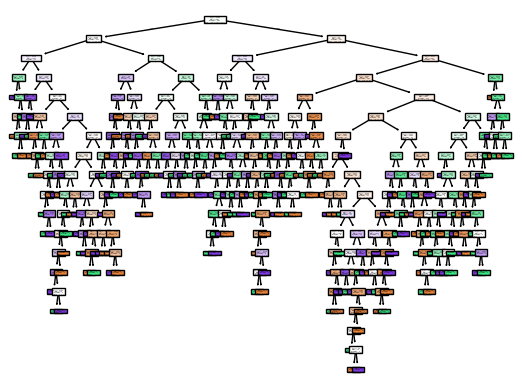

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [ ]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [ ]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
